In this project I'm taking data from multiple files, cleaning up the data, and then finally doing some exploratory analysis. The first thing I need is to create a single dataframe that contains all of the data

In [1]:
#import packages, concatenate csv files into dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []
for n in files:
  data = pd.read_csv(n)
  df_list.append(data)
census_df = pd.concat(df_list)


Now that I have a usable data, I need to see what the data looks like and make sure it's understandable.

In [2]:
#View the data

print(census_df.head())
print('\nColumns')
print(census_df.columns)
print('\nDatatypes in each Column')
print(census_df.dtypes)


   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

Unfortunately, the demographic percentages, income, and gender populations are all strings instead of numbers. The gender populations are especially messy as they contain two measures as a single string. The indices from the old csv files are still in place. While they won't impact the data, they're still adding unnecessary clutter. Let's also check for duplicates.

In [3]:
#Count the duplicates
print('\nDuplicate Count:')
print(census_df.duplicated(subset='State').value_counts())


Duplicate Count:
False    51
True      9
dtype: int64


In [4]:
census_df

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


It looks like some rows are duplicated as well. Let's start by dropping the duplicated rows and recheck the dataframe

In [5]:
#Drop the duplicates
census_df = census_df.drop_duplicates('State')

#Double-check dataframe 
census_df

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F


Now let's reset the index and drop the 'Unnamed: 0' column.

In [6]:
census_df = census_df.reset_index(drop=True)
census_df = census_df.drop(columns=['Unnamed: 0'])
census_df.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
7,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
8,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
9,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F


Next let's convert the other columns to numeric data. Income should be simple enough after we remove the comma and dollar characters.

In [7]:
#Remove commas and dollar signs from income column and convert values into numeric data
census_df.Income = census_df.Income.replace(r'[,\$]','', regex=True)
census_df.Income = pd.to_numeric(census_df.Income)

Gender is a little trickier. We'll need to split the strings, create new columns, and convert the new columns into numeric form

In [8]:
#Split gender into multiple columns
gender_split = census_df.GenderPop.str.split('_')

census_df['Men'] = gender_split.str.get(0)
census_df['Women'] = gender_split.str.get(1)

#Remove M and F characters and convert values into numeric data
census_df.Men = census_df.Men.replace(r'M','', regex=True)
census_df.Men = pd.to_numeric(census_df.Men, downcast='integer')
census_df.Women = census_df.Women.replace(r'F','', regex=True)
census_df.Women = pd.to_numeric(census_df.Women, downcast='integer')

Before we move on, some the old gender pop values only had population numbers for men

In [9]:
#Check the new Women column for NaN values
print('Number of NaN values in Women column:', census_df.Women.isnull().sum())

Number of NaN values in Women column: 2


Because we have the numbers for total population and male population, this should be a pretty easy fix

In [10]:
#Remove old gender column
census_df = census_df.drop(columns=['GenderPop'])

#Fill in missing values in the Women column
census_df['Women'] = census_df['Women'].fillna(census_df.TotalPop - census_df.Men)

Now that we have the gender data all cleaned up, we can do a little exploratory analysis. Unfortunately, we're not given income data by gender breakdown. We might be able to see if there's a relationship between the gender ratio of a state and the average state income.

Text(0.5, 1.0, 'Gender Ratio and Income')

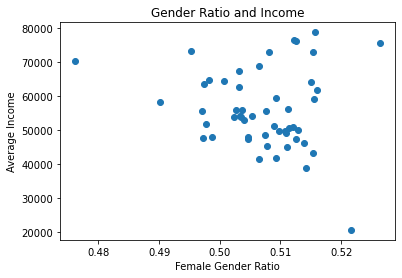

In [11]:
#View replationship between population gender ratio and average income
x = census_df.Women/(census_df.Women+census_df.Men)
y = census_df.Income
plt.scatter(x, y) 
plt.xlabel('Female Gender Ratio')
plt.ylabel('Average Income')
plt.title('Gender Ratio and Income')


In [12]:
np.corrcoef(x, y)

array([[ 1.        , -0.14461804],
       [-0.14461804,  1.        ]])

While we do see a negative relationship, it's a pretty weak one. We'd need a dataset with a breakdown of income by gender for more meaningful results.

Moving on to ethnic demographic data, we have some more cleaning up to do. Let's convert the data to numeric values and check for any missing values.

In [13]:
#Remove percentage signs from dataframe and convert values into numeric data

census_df.Hispanic = census_df.Hispanic.replace('[%,]','',regex=True)
census_df.Hispanic = pd.to_numeric(census_df.Hispanic)

census_df.White = census_df.White.replace('[%,]','',regex=True)
census_df.White = pd.to_numeric(census_df.White)

census_df.Black = census_df.Black.replace('[%,]','',regex=True)
census_df.Black = pd.to_numeric(census_df.Black)

census_df.Native = census_df.Native.replace('[%,]','',regex=True)
census_df.Native = pd.to_numeric(census_df.Native)

census_df.Asian = census_df.Asian.replace('[%,]','',regex=True)
census_df.Asian = pd.to_numeric(census_df.Asian)

census_df.Pacific = census_df.Pacific.replace('[%,]','',regex=True)
census_df.Pacific = pd.to_numeric(census_df.Pacific)

In [14]:
#Recheck datatypes
print(census_df.dtypes)

#Check for nan values
print(census_df.isnull().sum())


State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int32
Women       float64
dtype: object
State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
Income      0
Men         0
Women       0
dtype: int64


The 'Pacific' column has a few missing values. Luckily we can fill these in since no other column is missing anything.

In [15]:
#Fill in missing values in the 'Pacific' column
census_df['Pacific'] = census_df['Pacific'].fillna(100 - (census_df['Hispanic'] +census_df['Black']+census_df['White']+census_df['Native']+census_df['Asian']))


Now let's take a look at the demographics with some histograms.

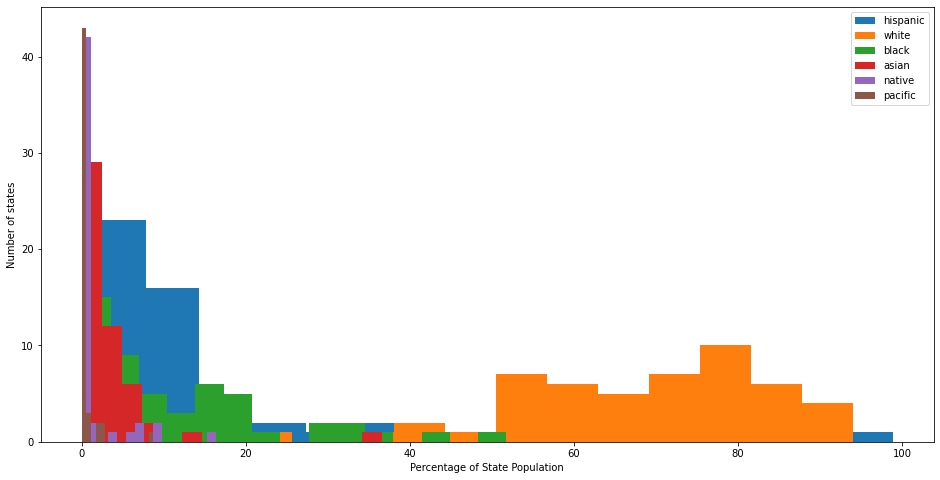

In [17]:

plt.figure(figsize=(16,8))

plt.hist(census_df.Hispanic, bins=15, label='hispanic')
plt.hist(census_df.White, bins=15, label='white')
plt.hist(census_df.Black, bins=15, label='black')
plt.hist(census_df.Asian, bins=15, label='asian')
plt.hist(census_df.Native, bins=15, label='native')
plt.hist(census_df.Pacific, bins=15, label='pacific')
plt.legend()
plt.xlabel('Percentage of State Population')
plt.ylabel('Number of states')

plt.show()
